# Machine Learning Tutorial in R: From Data Cleaning to Classification (Using Iris Dataset)
This notebook demonstrates a complete machine learning workflow in R—from data cleaning to model evaluation—using the Iris dataset.

## Step 1: Install the Required Libraries/Packages

Before we begin working on machine learning tasks in R, we need to install and load several essential packages:

These commands install the following libraries:

* **`tidyverse`**: A collection of R packages designed for data science. It includes tools like `ggplot2`, `dplyr`, and `readr` for data manipulation and visualization.
* **`caret`**: Short for *Classification And Regression Training*, this package provides a unified interface for building and evaluating machine learning models.
* **`randomForest`**: Implements the Random Forest algorithm, a popular ensemble method for classification and regression tasks.
* **`corrplot`**: A visualization tool to display correlation matrices in a clear and informative way.


In [ ]:
install.packages("tidyverse")
install.packages("caret")
install.packages("randomForest")
install.packages("corrplot")

## Step 2: Load Libraries
Once installed, we can load the libraries. This makes the functions from each package available in our R environment so we can use them in the rest of our analysis.

In [3]:
library(tidyverse)
library(caret)
library(randomForest)
library(corrplot)

## Step 3: Load Iris Dataset, a built-in dataset in R

This section begins by loading the built-in **Iris** dataset into a variable called `df`. The Iris dataset is a classic dataset in machine learning, containing measurements of sepal length, sepal width, petal length, and petal width for 150 iris flowers across three species. To get an initial sense of the data, the `head(df)` function is used to display the first six rows, providing a quick preview of the dataset's structure and values. Similarly, `tail(df, n = 10)` shows the last ten rows, offering a look at how the dataset ends and helping to identify any potential issues or patterns in the data.


In [4]:
# Load Iris Dataset, a built-in dataset in R
df <- iris

# Display the first 6 rows of a data frame df
head(df)

# Display the last 10 rows of df
tail(df, n = 10)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
141,6.7,3.1,5.6,2.4,virginica
142,6.9,3.1,5.1,2.3,virginica
143,5.8,2.7,5.1,1.9,virginica
144,6.8,3.2,5.9,2.3,virginica
145,6.7,3.3,5.7,2.5,virginica
146,6.7,3.0,5.2,2.3,virginica
147,6.3,2.5,5.0,1.9,virginica
148,6.5,3.0,5.2,2.0,virginica
149,6.2,3.4,5.4,2.3,virginica


## Step 3: Exploratory Data Analysis

This block of code provides essential information about the structure and contents of the dataset. The `str(df)` function reveals the internal structure of the data frame, including the number of rows and columns, the column names, and the data type of each column—helpful for understanding how the data is organized. Next, `summary(df)` generates descriptive statistics (such as mean, median, min, max, and quartiles) for all numerical features, offering a quick overview of the distribution and range of the values. Finally, to make the dataset more intuitive for machine learning tasks, the fifth column (originally named "Species") is renamed to `"target"` using `colnames(df)[5] <- "target"`, clearly designating it as the variable we aim to predict.


In [5]:
#find the number of rows and columns, column names, and datatype of columns
str(df)

# find the summary statistics of all the numerical features
summary(df)

# Rename target column for consistency; the column 5 ("species") is renamed as "target"
colnames(df)[5] <- "target"

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

# Step 4: Data Cleaning

This section focuses on exploring and visualizing the dataset to better understand its structure before building a machine learning model. First, `anyNA(df)` checks for any missing values in the dataset—although the Iris dataset is clean, it's good practice to confirm this before proceeding. Next, a bar chart is created using `ggplot()` to visualize the distribution of the `target` variable (i.e., the flower species). This helps assess class balance, which is important for model training. Lastly, a heatmap of correlations is generated using `corrplot()`, which calculates pairwise correlations between the four numerical features (sepal and petal measurements) and visually represents their relationships. In a heatmap, brighter or darker colors typically indicate stronger positive or negative correlations, helping you quickly identify which features move together or in opposite directions.

[1] FALSE

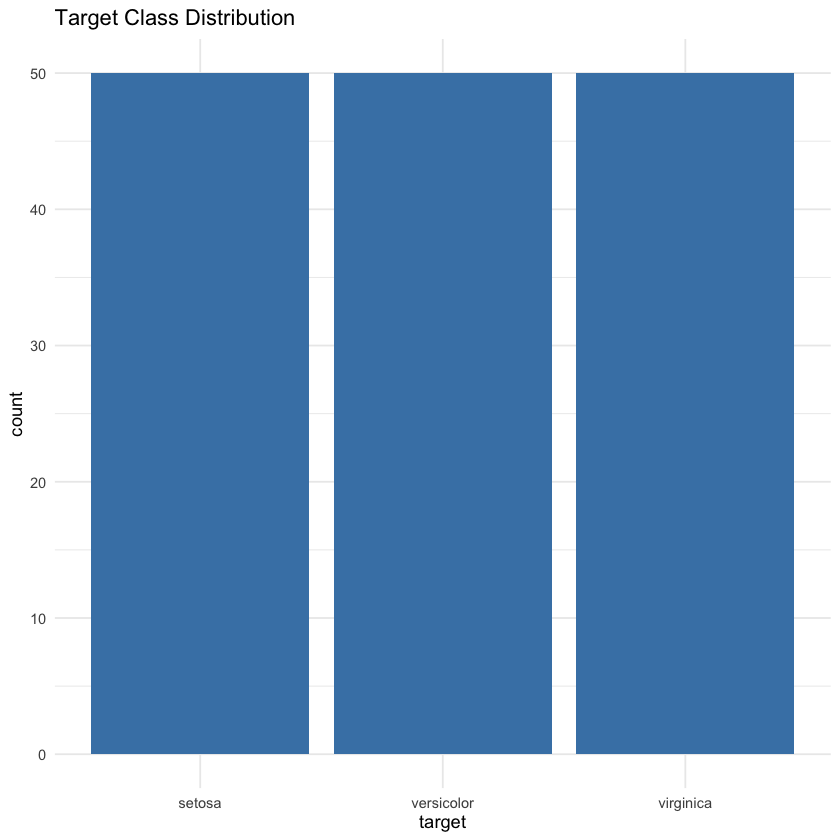

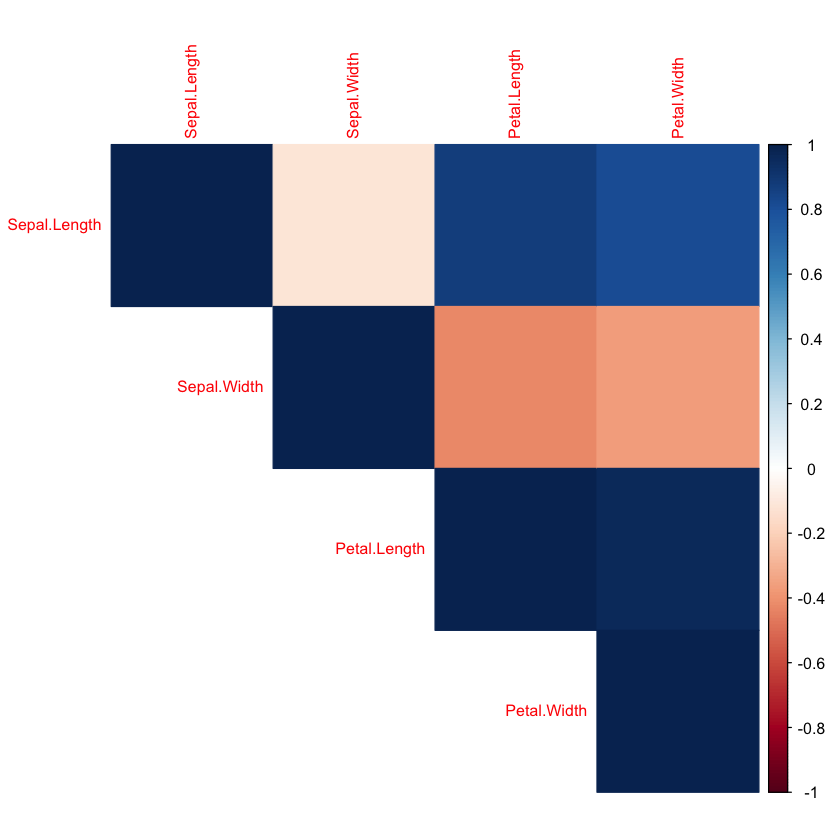

In [6]:
# No missing values in iris; but check anyway; 
anyNA(df)

# Plot the number of classes in target variable (column y)
ggplot(df, aes(x=target)) + geom_bar(fill='steelblue') + theme_minimal() +
  ggtitle("Target Class Distribution")

# plot heatmap of correlation between all the features of dataset df; we are interested in the correlation between the features (X)
corrplot(cor(df[, 1:4]), method="color", type="upper", tl.cex=0.8)

# Step 5: Split the Data

This section prepares the data for machine learning by splitting it into training and testing sets. Using `set.seed(42)` ensures that the random split is reproducible, meaning you'll get the same results each time you run the code. The `createDataPartition()` function from the **caret** package is used to randomly divide the dataset, while preserving the proportion of each class in the `target` variable. In this example, 80% of the data is used for training (`train`) and 20% for testing (`test`). However, other common split ratios include 70/30 or 75/25, depending on the size of the dataset and the need for training versus evaluation. A larger training set (like 80%) gives the model more data to learn from, while a larger test set (like 30%) provides a more robust evaluation. The ideal split often depends on the problem context and the amount of available data.

In [7]:
set.seed(42) # set a random seed to replicate the results
trainIndex <- createDataPartition(df$target, p = .8, list = FALSE)
train <- df[trainIndex, ]
test <- df[-trainIndex, ] # whatever is left after assigning to "train"

# Step 6: Feature Scaling
This section focuses on **feature scaling**, an important preprocessing step in many machine learning workflows. Since the numerical features in the Iris dataset have different value ranges—for instance, `Petal.Width` ranges up to 2.5 while `Sepal.Length` goes up to 7.9—scaling is used to standardize the values. Using the `preProcess()` function from the **caret** package with the `"center"` and `"scale"` methods, the features in the training data are transformed so that they have a mean of 0 and a standard deviation of 1. This ensures that no single feature disproportionately influences the model due to its magnitude. The scaling model learned from the training data is then applied to both the training and testing features using `predict()`. Note that **only the input features (columns 1 to 4) are scaled**—the target variable (`target`) remains unchanged.


In [8]:
#Numerical value of feature may be of different magnitudes (for example, max value of  "Petal.Width" is 2.5 wheras max value "Sepal.Length" is 7.9. 
#Hence, we scale the features to transform them to a similar scale (between 0 and 1), 
#so the feature with high numerical values does not dominate the model creation. Only feature values are scaled, NOT the target values.```
preproc <- preProcess(train[, 1:4], method = c("center", "scale"))
train_scaled <- predict(preproc, train[, 1:4])
test_scaled <- predict(preproc, test[, 1:4])

# Step 7: Train Classifier

This line of code demonstrates how to train a machine learning model—in this case, a [Random Forest](https://scikit-learn.org/stable/modules/ensemble.html#) classifier—using the preprocessed training data. The `randomForest()` function takes the scaled feature values (`train_scaled`) as input (`x`) and the corresponding class labels (`train$target`) as output (`y`). Random Forest is a powerful ensemble learning method that builds multiple decision trees and combines their predictions to improve accuracy and reduce overfitting. While this example uses Random Forest, other popular classification algorithms such as [Decision Tree](https://scikit-learn.org/stable/modules/tree.html), [Logistic Regression](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression), [Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html), and [XGBoost](https://scikit-learn.org/stable/modules/ensemble.html#) can also be used depending on the problem and dataset characteristics.


In [9]:
model <- randomForest(x = train_scaled, y = train$target)

# Step 8: Evaluate Model

This code uses the trained Random Forest model to make predictions on the scaled test dataset. The `predict()` function generates predicted class labels (`pred`) for each example in the test set based on the learned patterns from the training data. Then, `confusionMatrix()` compares these predictions to the true target values (`test$target`) to evaluate the model’s performance. The confusion matrix provides detailed insight into how well the model classified each class, showing counts of true positives, false positives, true negatives, and false negatives, which help assess accuracy, precision, recall, and other important metrics.

In [10]:
pred <- predict(model, newdata = test_scaled)
confusionMatrix(pred, test$target)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         10          0         0
  versicolor      0          9         1
  virginica       0          1         9

Overall Statistics
                                          
               Accuracy : 0.9333          
                 95% CI : (0.7793, 0.9918)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : 8.747e-12       
                                          
                  Kappa : 0.9             
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.9000           0.9000
Specificity                 1.0000            0.9500           0.9500
Pos Pred Value              1.0000            0.9000           0.9000
Neg Pred Value              1.0000            0.9500           0.9500
P

### Summary of Output

The model achieved an overall accuracy of approximately 93%, indicating strong performance in correctly classifying the Iris species. Sensitivity and specificity values are high across all classes, showing the model effectively identifies each species with few misclassifications. The balanced accuracy values near or above 90% for all classes further confirm that the model performs consistently well across the different species.
